# INITIALIZATION

In [6]:
#importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IMPORTING DATASET:

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
#IMPOETING THE DATASET:
df=pd.read_csv("bank-full.csv",sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
#INSPECTING DATASET:
df.shape


(45211, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
# selecting revelant coumn
features=['age', 'job', 'marital', 'education', 'balance', 'housing','contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']


In [12]:
df=df[features]
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [13]:
#checking for missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# EXPLORATORY DATA ANALYSIS:

In [14]:
# DATAFRAME INFORMATION:
df.describe(include=['O'])

,job,marital,education,housing,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,3,12,4,2
top,blue-collar,married,secondary,yes,cellular,may,unknown,no
freq,9732,27214,23202,25130,29285,13766,36959,39922


In [15]:
# CALCULATING MODEL:
mode=df['education'].mode()
mode

0    secondary
dtype: object

- Answer for Question 1:secondary

In [16]:
#INSPECTING DATASET:
df_numeric=df.copy()
df_numeric=df_numeric.drop(['job','marital','education','housing','contact','duration','poutcome','y'],axis=1)
df_numeric.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [17]:
#INSPECTING CORRELATION:
df_numeric.corr()

,age,balance,day,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.162490,-0.093044,-0.051710
campaign,0.004760,-0.014578,0.162490,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,-0.032855,0.454820,1.000000


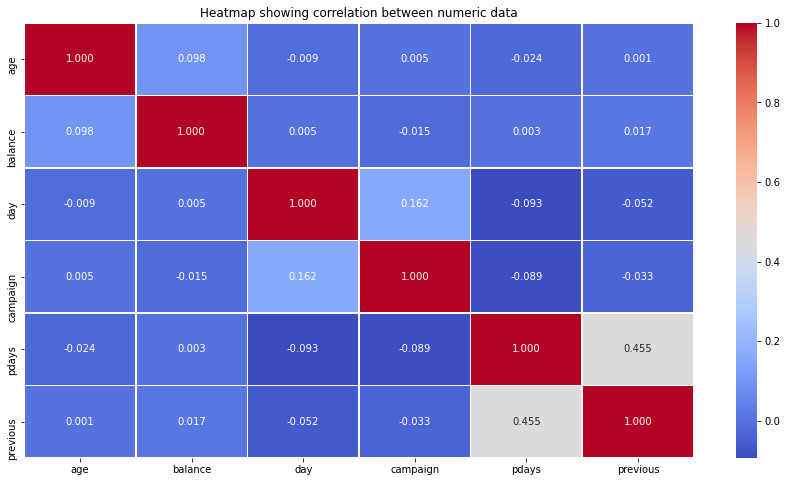

In [18]:
#INSPECTING HEATMAP:
plt.figure(figsize=(15,8))
sns.heatmap(df_numeric.corr(),cmap='coolwarm',annot=True,linewidth=0.5,fmt='0.3f')
plt.title('Heatmap showing correlation between numeric data')
plt.show()

In [19]:
#INSPECTING HEATMAP:
df_numeric.corr().unstack().sort_values(ascending=False)

previous  previous    1.000000
pdays     pdays       1.000000
balance   balance     1.000000
day       day         1.000000
campaign  campaign    1.000000
age       age         1.000000
pdays     previous    0.454820
previous  pdays       0.454820
campaign  day         0.162490
day       campaign    0.162490
age       balance     0.097783
balance   age         0.097783
previous  balance     0.016674
balance   previous    0.016674
campaign  age         0.004760
age       campaign    0.004760
balance   day         0.004503
day       balance     0.004503
pdays     balance     0.003435
balance   pdays       0.003435
previous  age         0.001288
age       previous    0.001288
          day        -0.009120
day       age        -0.009120
balance   campaign   -0.014578
campaign  balance    -0.014578
age       pdays      -0.023758
pdays     age        -0.023758
previous  campaign   -0.032855
campaign  previous   -0.032855
previous  day        -0.051710
day       previous   -0.051710
campaign

- Answer for Question 2:pdays and previous

# MUTUAL INFORMATION:



In [20]:
#PREPARING DATASET:
df_class=df.copy()
df_class['y']=np.where(df_class['y']=='yes',0,1)
df_class

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,0
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,0
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,0
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,1


In [21]:
#SPLITTING THE DATASET:
SEED=42
df_full_train,df_test=train_test_split(df_class,test_size=0.20,random_state=SEED)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=SEED)

In [22]:
#PROCESSING THE DATASET:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [23]:
#PROCESSING THE DATASET:
y_train=df_train.y.values
y_test=df_test.y.values
y_val=df_val.y.values

In [24]:
#DEFINING FUNCTION:
def calculate_m(series):
    return mutual_info_score(series,df_train.y)

In [25]:
#PREPARING DATASET:
cat=['job','marital','education','housing','contact','duration','poutcome','y']
cat

['job',
 'marital',
 'education',
 'housing',
 'contact',
 'duration',
 'poutcome',
 'y']

In [26]:
#IMPLEMENTATION:
mi=df_train[cat].apply(calculate_m)
mi=mi.sort_values(ascending=False).to_frame(name='MI')
mi

,MI
y,0.357483
duration,0.099877
poutcome,0.029533
contact,0.013356
housing,0.010343
job,0.007316
education,0.002697
marital,0.002050


- Answer for Question 3:poutcome	0.029533

# CLASSIFICATION AND ACCURACY OF MODEL:



In [27]:
#PREPARING THE DATASET:
df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

In [28]:
#TRANSFORMING THE DATASET:
cat=['job','marital','education','housing','contact','duration','poutcome','y']
num=['age','balance','day','month','campaign','pdays','previous']
train_dict=df_train.to_dict(orient='records')

In [29]:
# VECTORIZING THE DATASET:
dv=DictVectorizer(sparse=False)
X_train=dv.fit_transform(train_dict)

In [30]:
#TRAINING LOGISTIC REGRESSSION MODEL:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [31]:
#NITIALIZING THE MODEL PREDICTION:
train_val=df_val.to_dict(orient='records')
X_val=dv.transform(train_val)
y_pred=model.predict(X_val)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
# INSPECTING THE ACCURACY:
accuracy=np.round(accuracy_score(y_val,y_pred),2)
accuracy

0.9

- Answer for Question 4:Accuracy is 0.9

# FEATURE ELIMINATION:



In [33]:
# INITIALIZING FEATURES:
features=num+cat
features

['age',
 'balance',
 'day',
 'month',
 'campaign',
 'pdays',
 'previous',
 'job',
 'marital',
 'education',
 'housing',
 'contact',
 'duration',
 'poutcome',
 'y']

In [34]:
#INSPECTING THE DIFFERENCE IN ACCURACY:
origin_score=accuracy
for c in features :
    subset=features.copy()
    subset.remove(c)
    dv=DictVectorizer(sparse=False)
    train_dict=df_train.to_dict(orient='records')
    X_train=dv.fit_transform(train_dict)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train,y_train)
    val_dict=df_val.to_dict(orient='records')
    X_val=dv.transform(val_dict)
    y_pred=model.predict(X_val)
    score=accuracy_score(y_val,y_pred)
    print(c,origin_score-score,score)
    


age -0.0010174740101747126 0.9010174740101747
balance -0.0010174740101747126 0.9010174740101747
day -0.0010174740101747126 0.9010174740101747
month -0.0010174740101747126 0.9010174740101747
campaign -0.0010174740101747126 0.9010174740101747
pdays -0.0010174740101747126 0.9010174740101747
previous -0.0010174740101747126 0.9010174740101747
job -0.0010174740101747126 0.9010174740101747
marital -0.0010174740101747126 0.9010174740101747
education -0.0010174740101747126 0.9010174740101747
housing -0.0010174740101747126 0.9010174740101747
contact -0.0010174740101747126 0.9010174740101747
duration -0.0010174740101747126 0.9010174740101747
poutcome -0.0010174740101747126 0.9010174740101747
y -0.0010174740101747126 0.9010174740101747


- Answer for Question 5:smallest difference - marital.

# RIDGE REGRESSION:



In [35]:
#SPLITTING THE DATASET:
SEED=42
df_full_train,df_test=train_test_split(df,test_size=0.20,random_state=SEED)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=SEED)

In [36]:
# PREPARING THE DATASET:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)


In [37]:
# PREPARING THE DATASET:
y_train=df_train.y.values
y_test=df_test.y.values
y_val=df_val.y.values

In [38]:
#DELETING DATASET:
del df_train['y']
del df_test['y']
del df_val['y']

In [39]:
#VECTORIZING THE DATASET:
dv=DictVectorizer(sparse=True)
train_dict=df_train.to_dict(orient='records')
X_train=dv.fit_transform(train_dict)

Val_dict=df_val.to_dict(orient='records')
X_val=dv.transform(Val_dict)

In [41]:
#RIDGE REGRESSION IMPLEMENTATION:

for alpha in [0.01, 0.1, 1, 10, 100]:
    model=Ridge(alpha=alpha,solver='auto',random_state=SEED)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_val)
    score=np.sqrt(mean_squared_error(y_val, y_pred, squared=False))